In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
import os
from google.colab import  drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
os.chdir('/content/gdrive/My Drive/placement/IIBM')
df = pd.read_excel('market_purchase_data.xlsx')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
df[df['ONEOFF_PURCHASES']==40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [9]:
df[df['CASH_ADVANCE']==47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [10]:
df[df['BALANCE']==19043.138560]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
138,C10144,19043.13856,1.0,22009.92,9449.07,12560.85,0.0,1.0,0.75,1.0,0.0,0,216,18000.0,23018.57583,18621.01331,0.0,12


In [11]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

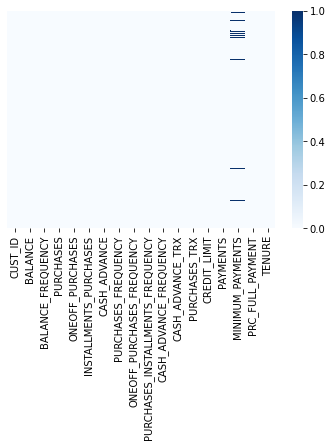

In [12]:

#missing elements
sns.heatmap(df.isnull(),yticklabels=False,cmap="Blues")

In [13]:
#filling nul value in minimu_payment and credit limit by average of it 
df.loc[df['CREDIT_LIMIT'].isnull()==True , 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [14]:
df.loc[df['MINIMUM_PAYMENTS'].isnull()==True,'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()

In [15]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

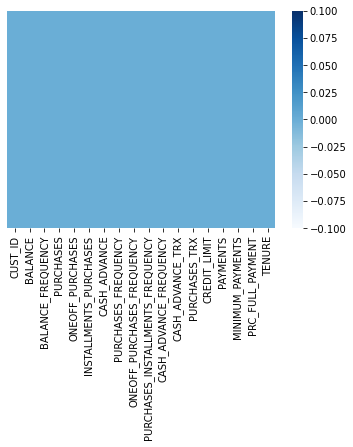

In [16]:
#missing elements after filling by taking mean
sns.heatmap(df.isnull(),yticklabels=False,cmap="Blues")

In [17]:
len(df.CUST_ID.unique()) # it will shows if customer repeats

8950

In [18]:
df.duplicated().sum()

0

In [19]:
df.drop("CUST_ID",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

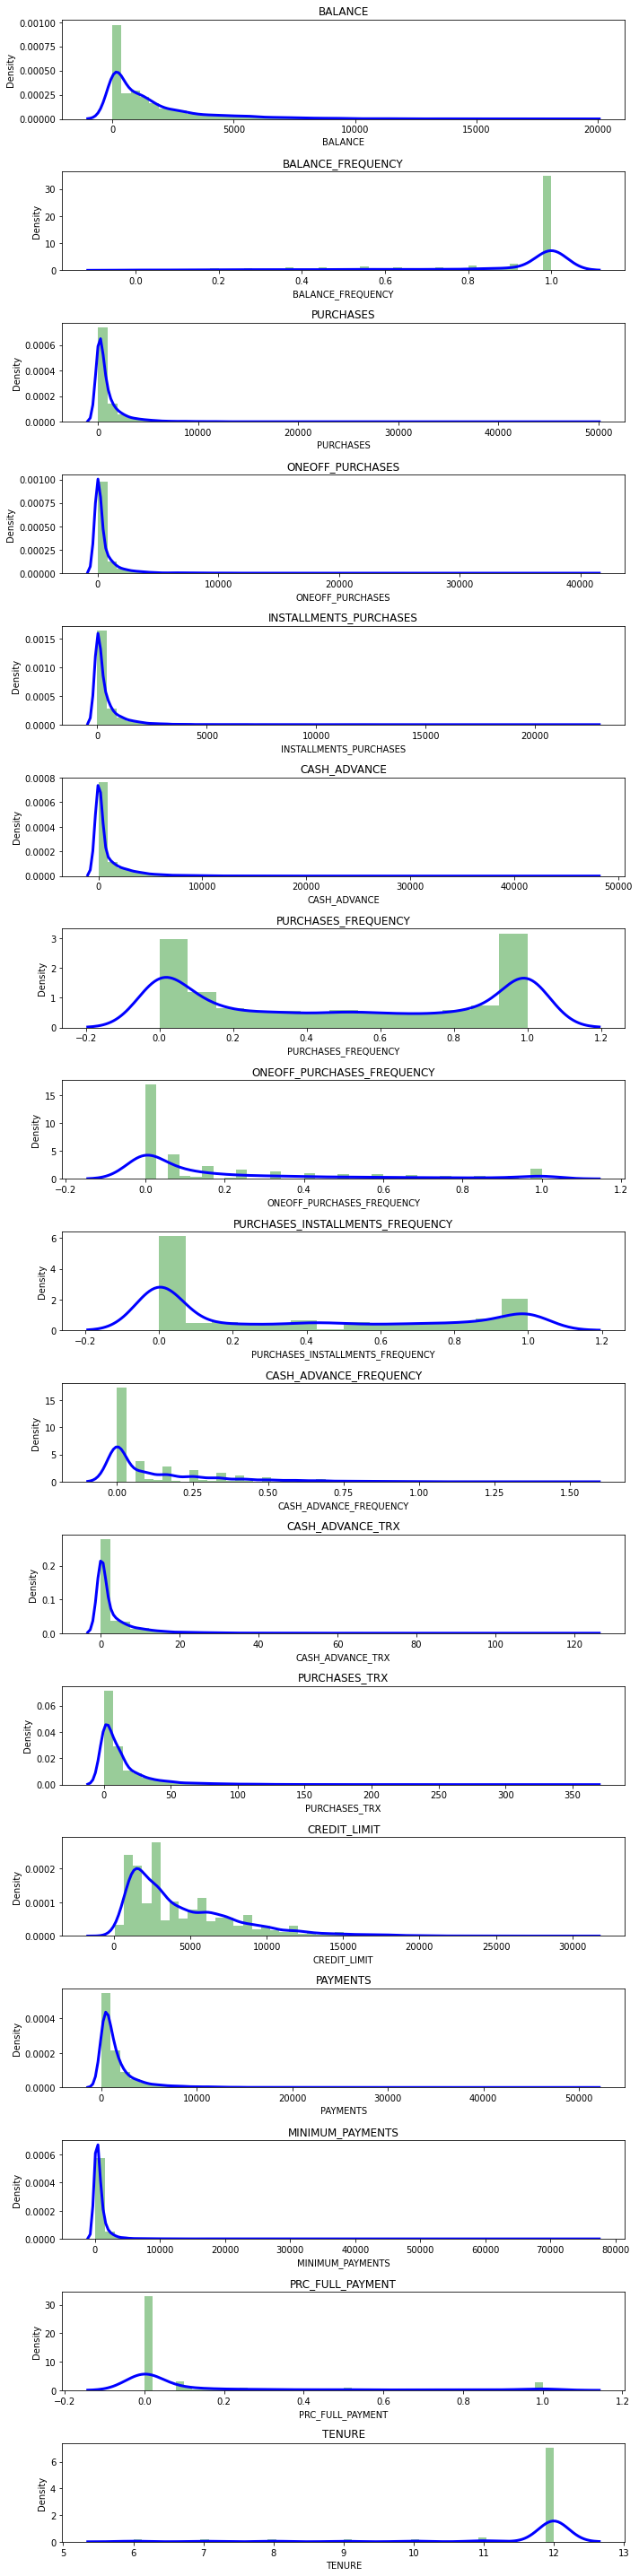

In [20]:
plt.figure(figsize=(10,40))
for i in range(17):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'b','lw':3,'label':'KDE'},hist_kws={'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()
plt.show()

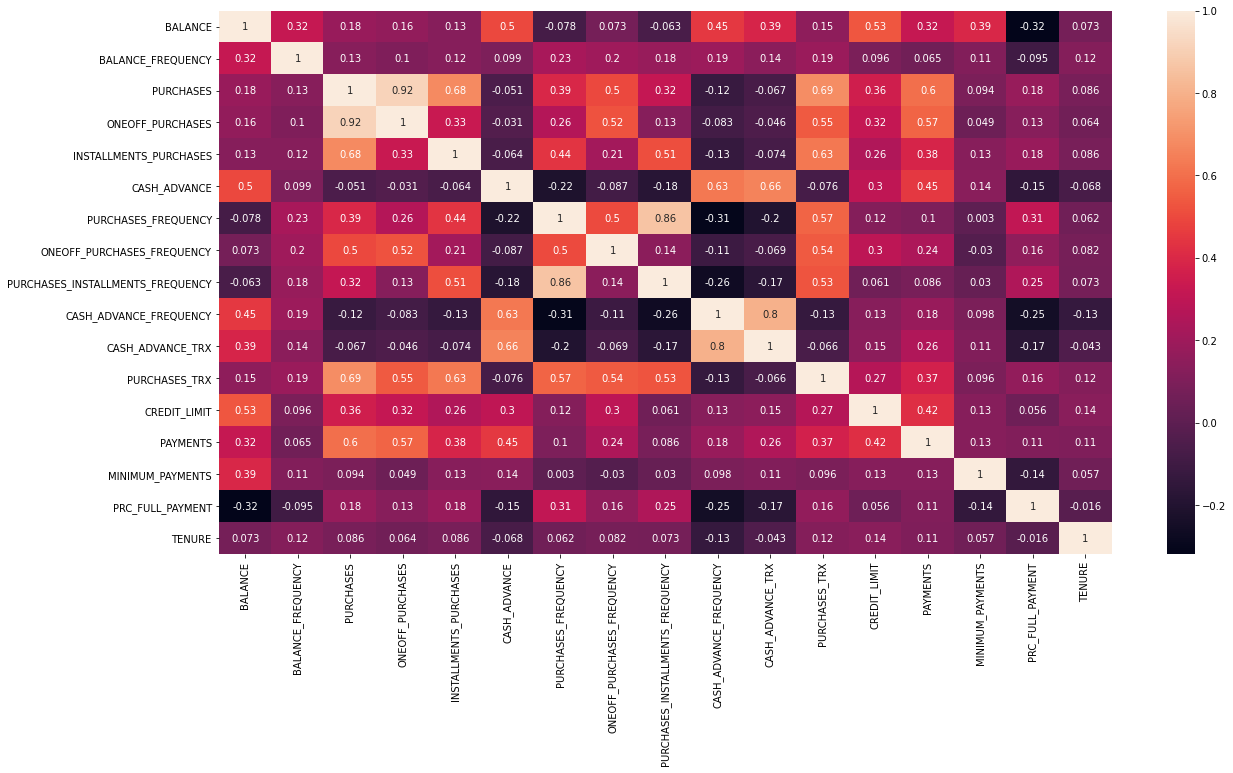

In [21]:
cm=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cm,annot=True)
#figure shows that independent variable are not correlated because correlation is less than 60 show no multicolinearty

In [22]:
#elbow method to know how many cluster will be select
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [23]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

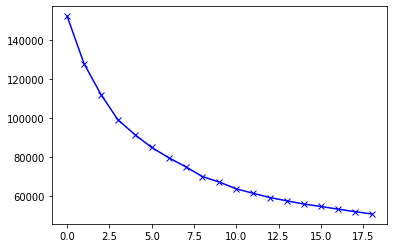

In [24]:
#elbow method
scores_1=[]
#range_values=range(1,20)
for i in range(1,20):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_) #appending lowest SSE value
    
plt.plot(scores_1,'bx-')
#it is seen that change occuring at near 7 cluster

In [43]:
pip install kneed

In [44]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 20), scores_1, curve="convex", direction="decreasing" )
kl.elbow

6

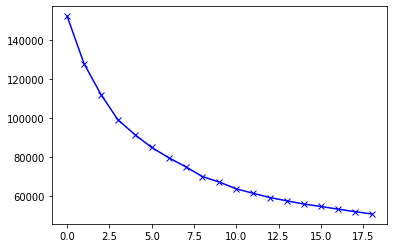

In [47]:
#here we are selecting cluster as 6
scores_2=[]
#range_values=range(1,20)
for i in range(1,20):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_scaled[:,:6])
    scores_2.append(kmeans.inertia_)
    
plt.plot(scores_1,'bx-')


In [48]:
kmeans=KMeans(6)
kmeans.fit(df_scaled)
labels=kmeans.labels_

In [49]:
labels

array([2, 1, 0, ..., 4, 2, 2], dtype=int32)

In [50]:
labels.shape

(8950,)

In [51]:
kmeans.cluster_centers_

array([[ 0.1405251 ,  0.4274129 ,  0.928246  ,  0.87740575,  0.5828349 ,
        -0.30803359,  1.08764149,  1.83719922,  0.54276797, -0.40408233,
        -0.31737783,  1.18329705,  0.69215176,  0.38019752, -0.02316811,
         0.43422546,  0.27164176],
       [ 1.61236391,  0.37625975, -0.19938003, -0.14877612, -0.19820527,
         1.94891339, -0.44307697, -0.18489965, -0.39843568,  1.89109951,
         1.85503029, -0.23929895,  0.9689568 ,  0.7814368 ,  0.5722418 ,
        -0.39234246, -0.0921939 ],
       [-0.01216908,  0.37176367, -0.34549435, -0.22405357, -0.40519056,
        -0.07767832, -0.82711531, -0.33600984, -0.77119028,  0.13784628,
        -0.0247315 , -0.47093035, -0.33154716, -0.26118735, -0.03270929,
        -0.45052854, -0.00877336],
       [-0.69808345, -2.12195727, -0.3129182 , -0.23091847, -0.31555317,
        -0.30784787, -0.55953232, -0.41850675, -0.4647188 , -0.48568753,
        -0.35917666, -0.42561905, -0.20907025, -0.22122484, -0.25609567,
         0.26217199

In [52]:
kmeans.cluster_centers_.shape # Final locations of the centroid a

(6, 17)

In [53]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [54]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.140525,0.427413,0.928246,0.877406,0.582835,-0.308034,1.087641,1.837199,0.542768,-0.404082,-0.317378,1.183297,0.692152,0.380198,-0.023168,0.434225,0.271642
1,1.612364,0.376260,-0.199380,-0.148776,-0.198205,1.948913,-0.443077,-0.184900,-0.398436,1.891100,1.855030,-0.239299,0.968957,0.781437,0.572242,-0.392342,-0.092194
2,-0.012169,0.371764,-0.345494,-0.224054,-0.405191,-0.077678,-0.827115,-0.336010,-0.771190,0.137846,-0.024732,-0.470930,-0.331547,-0.261187,-0.032709,-0.450529,-0.008773
3,-0.698083,-2.121957,-0.312918,-0.230918,-0.315553,-0.307848,-0.559532,-0.418507,-0.464719,-0.485688,-0.359177,-0.425619,-0.209070,-0.221225,-0.256096,0.262172,-0.164101
4,-0.398271,0.308135,-0.067859,-0.245123,0.289850,-0.366935,0.964222,-0.376930,1.138816,-0.464182,-0.358854,0.121123,-0.329803,-0.252608,-0.062115,0.341086,-0.025512
5,1.374491,0.412070,7.177493,6.384202,5.239545,0.016050,1.082454,1.917512,1.031769,-0.290144,-0.107898,4.786628,2.181050,4.962364,0.709040,0.864673,0.332658


In [55]:
# Descaling
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1856.965968,0.978521,2986.416727,2048.751207,938.118009,332.910282,0.926874,0.750530,0.580147,0.054283,1.082956,44.122172,7012.780749,2833.778407,810.214234,0.280718,11.880845
1,4920.474213,0.966403,577.226322,345.499478,231.833083,5065.833530,0.312522,0.147299,0.206089,0.513573,15.908046,8.761755,8019.910706,3995.326827,2197.791920,0.038961,11.393939
2,1539.145913,0.965338,265.050820,220.554334,44.658848,815.976047,0.158389,0.102219,0.057947,0.162729,3.080052,3.004265,3288.145232,977.032062,787.978920,0.021943,11.505577
3,111.473046,0.374599,334.650267,209.160008,125.716824,333.299755,0.265783,0.077609,0.179746,0.037953,0.797710,4.130534,3733.766331,1092.719604,267.386388,0.230395,11.297710
4,735.506321,0.950265,858.223454,185.583544,673.175253,209.391968,0.877339,0.090012,0.817032,0.042257,0.799910,17.720502,3294.490894,1001.869476,719.450013,0.253476,11.483176
5,4425.362379,0.974886,16338.028250,11188.905375,5149.122875,1012.529590,0.924792,0.774489,0.774489,0.077083,2.512500,133.687500,12430.000000,16098.700812,2516.595215,0.406617,11.962500


In [56]:
y_kmeans=kmeans.fit_predict(df_scaled)
y_kmeans

array([0, 3, 5, ..., 2, 0, 0], dtype=int32)

In [57]:
df_cluster=pd.concat([df,pd.DataFrame({'cluster':labels})],axis=1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


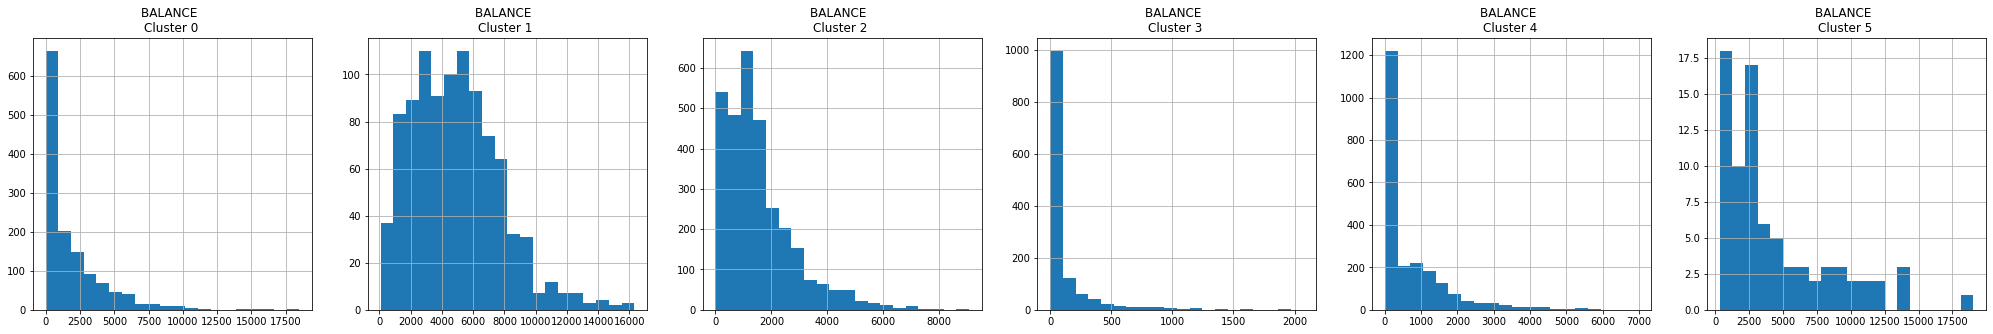

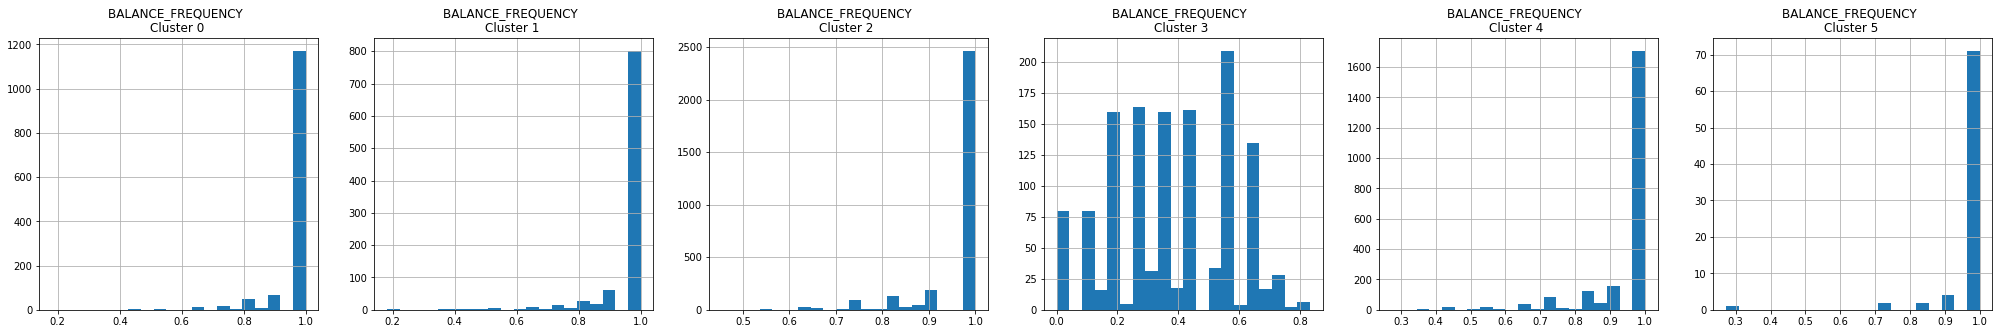

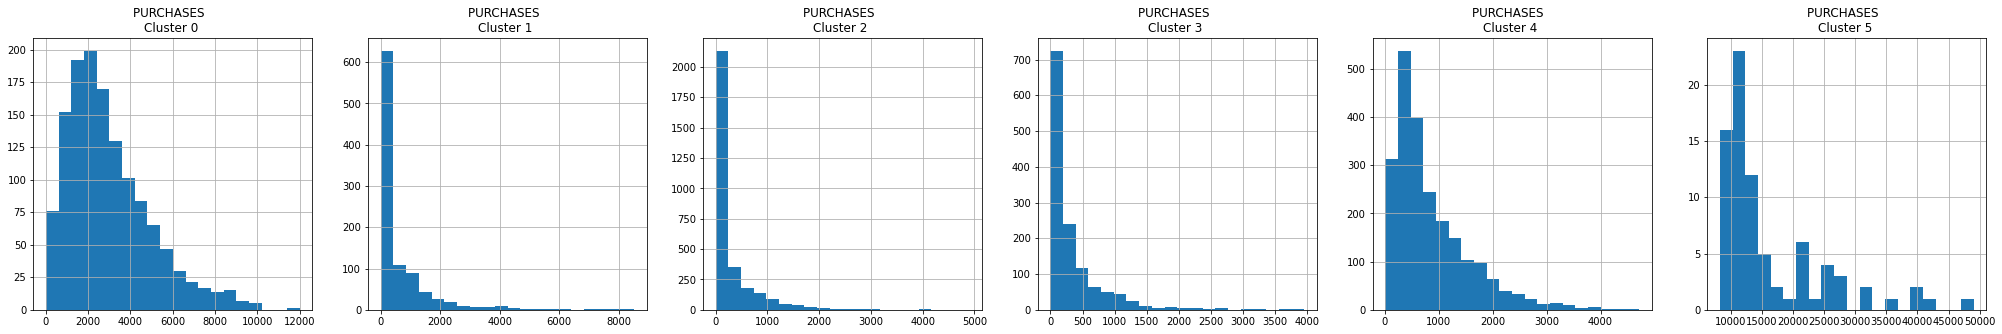

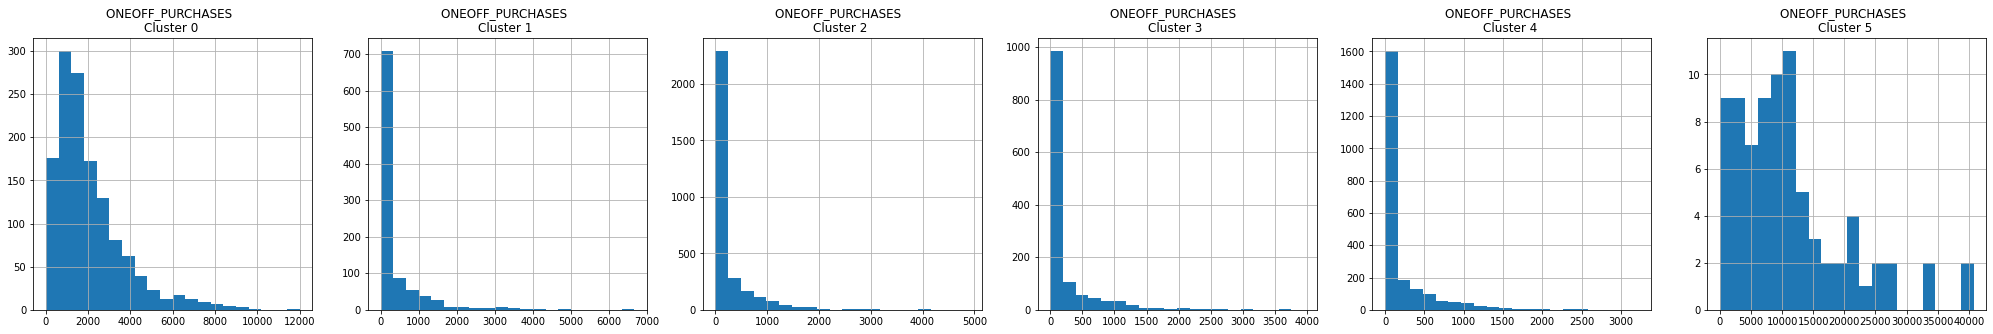

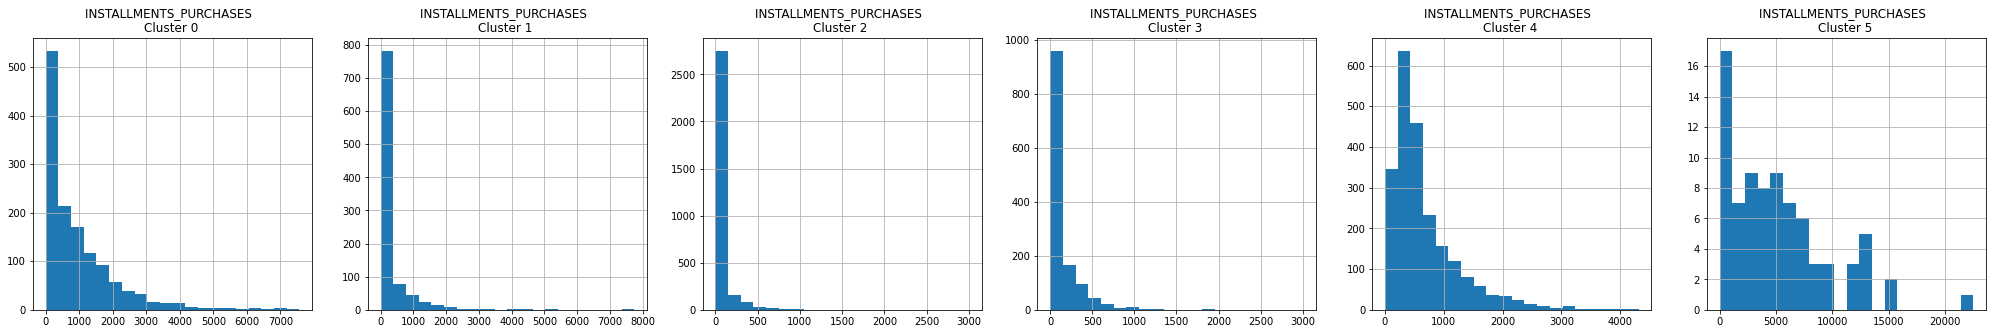

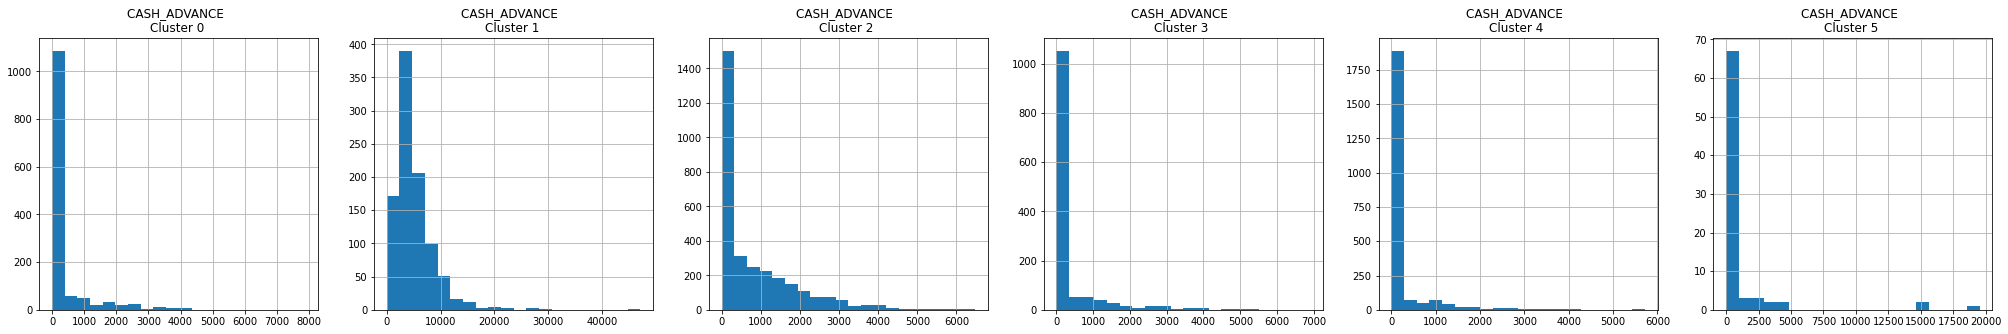

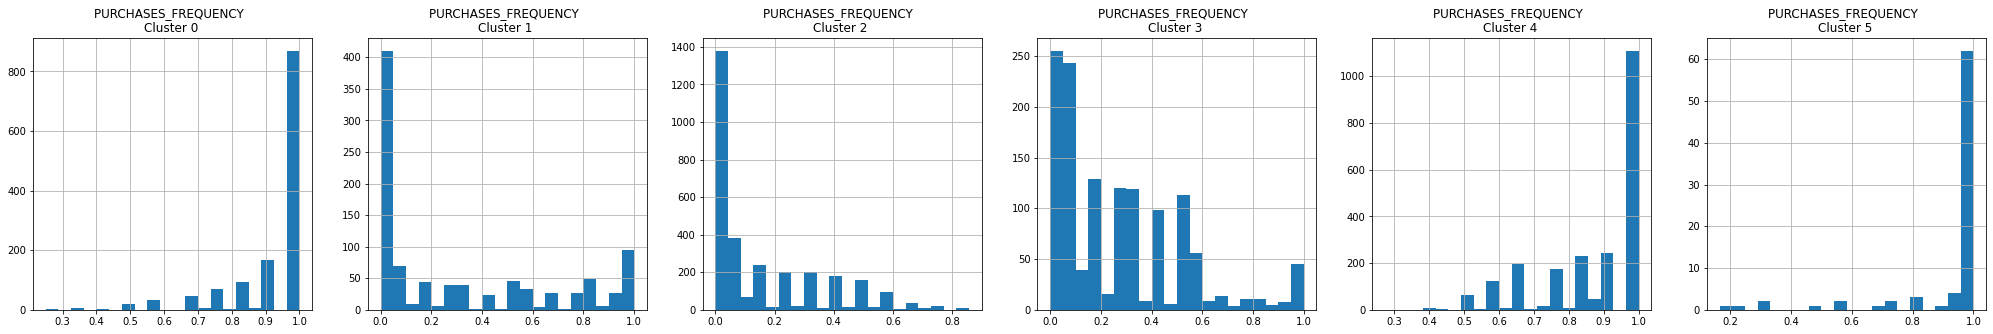

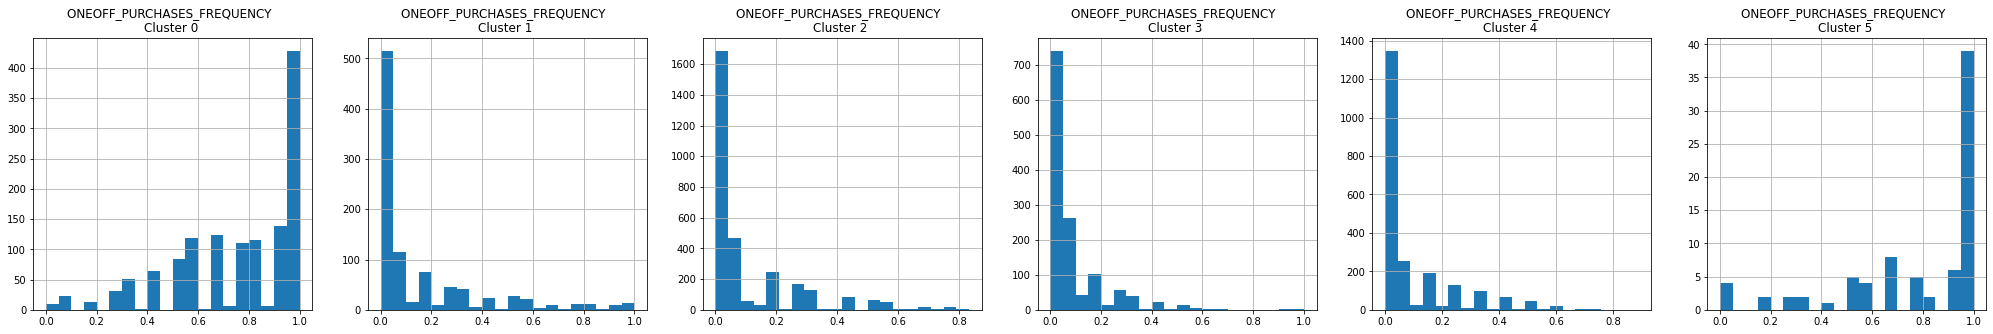

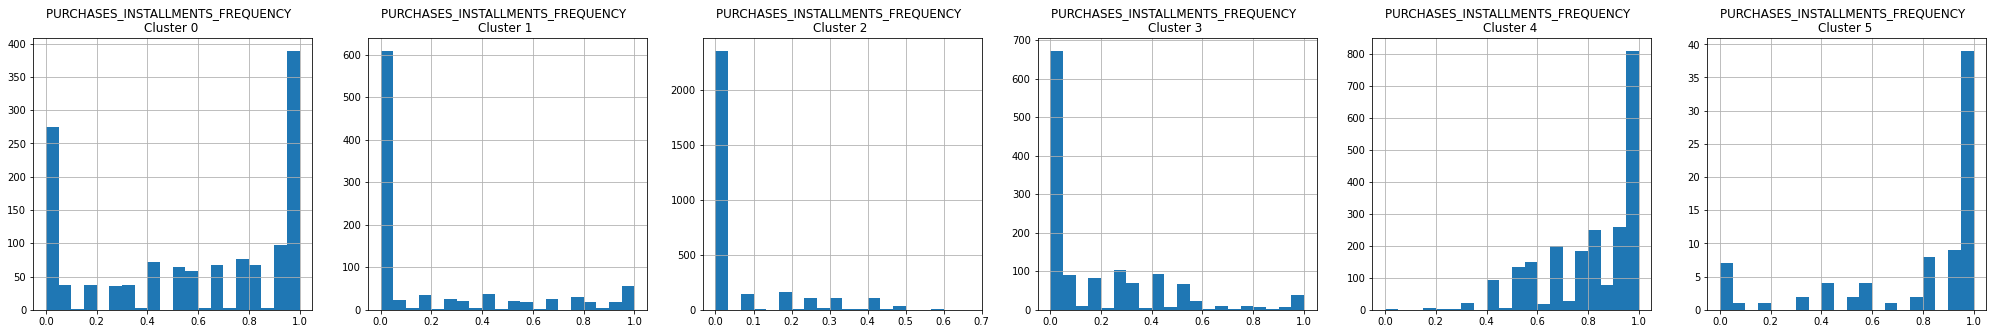

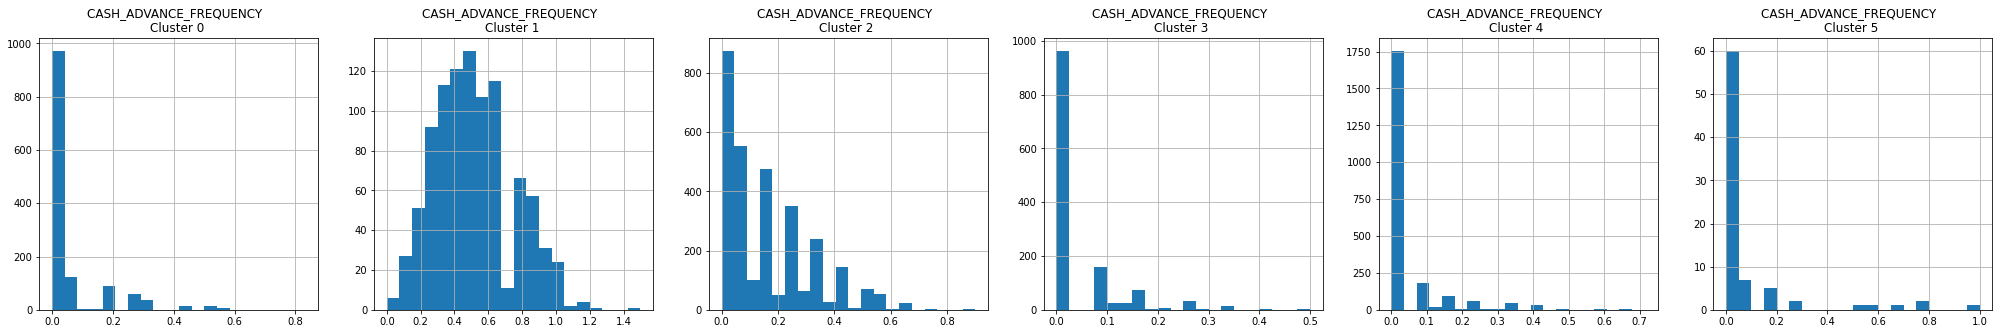

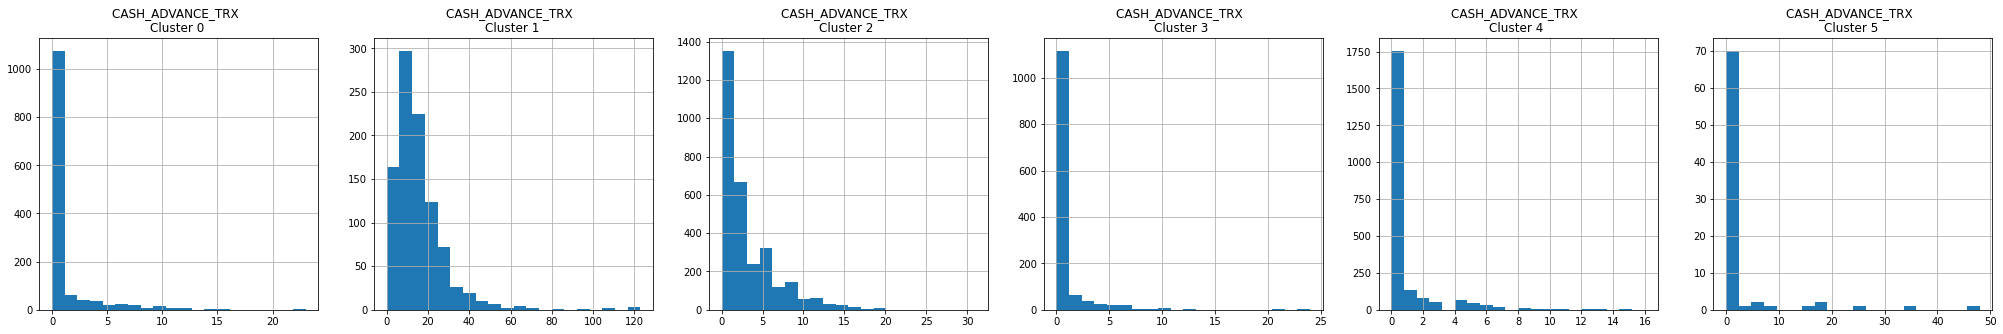

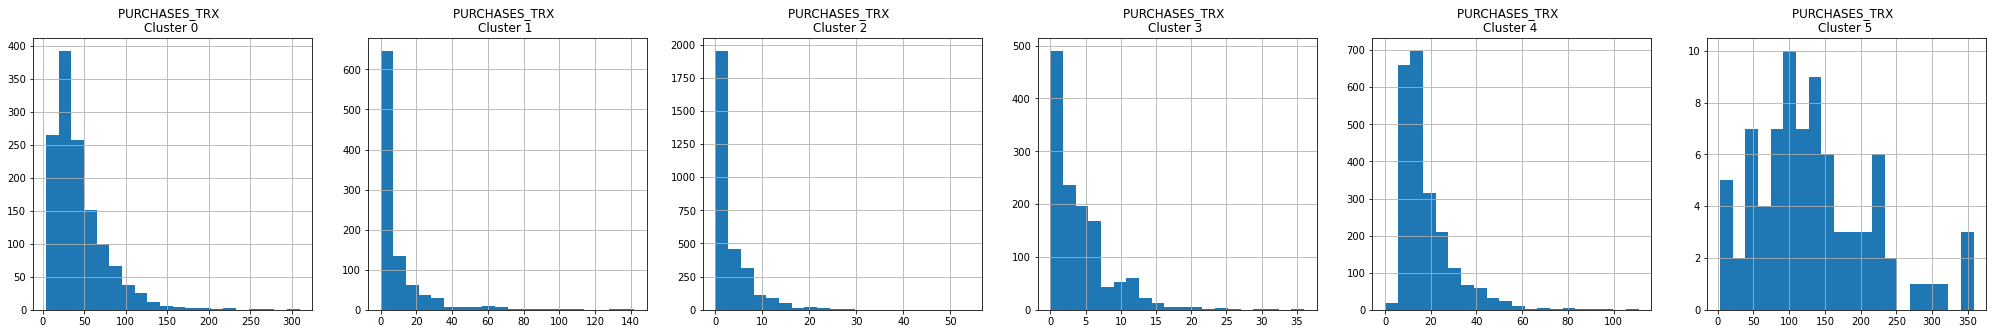

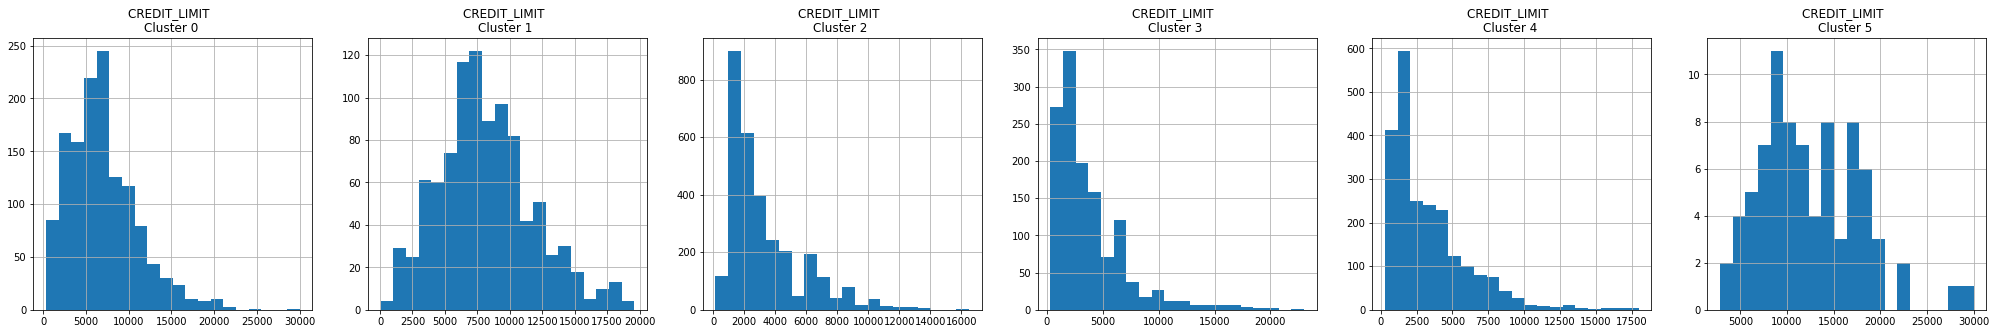

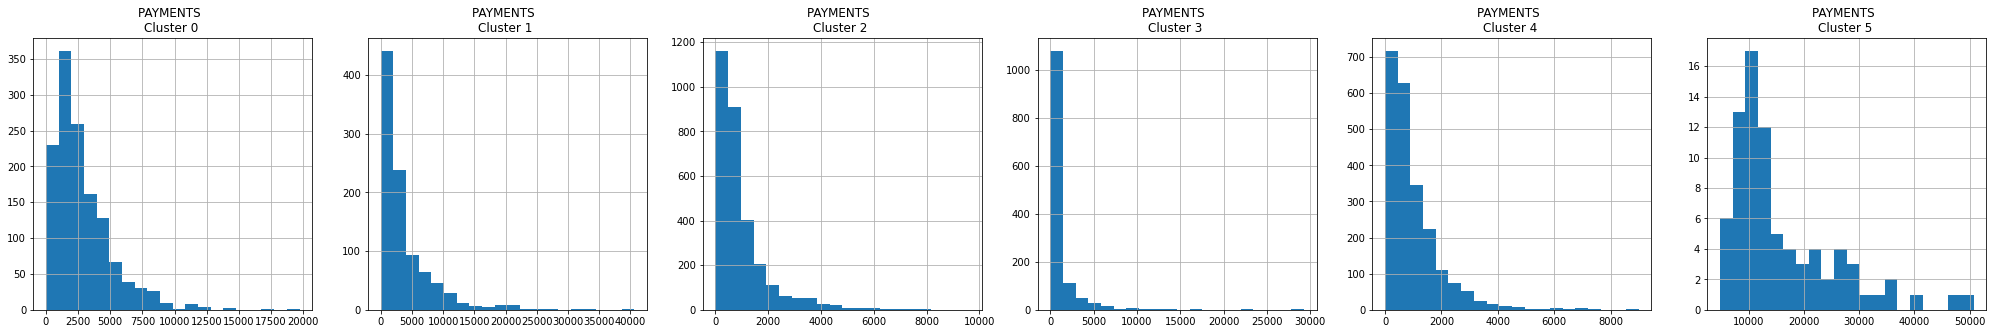

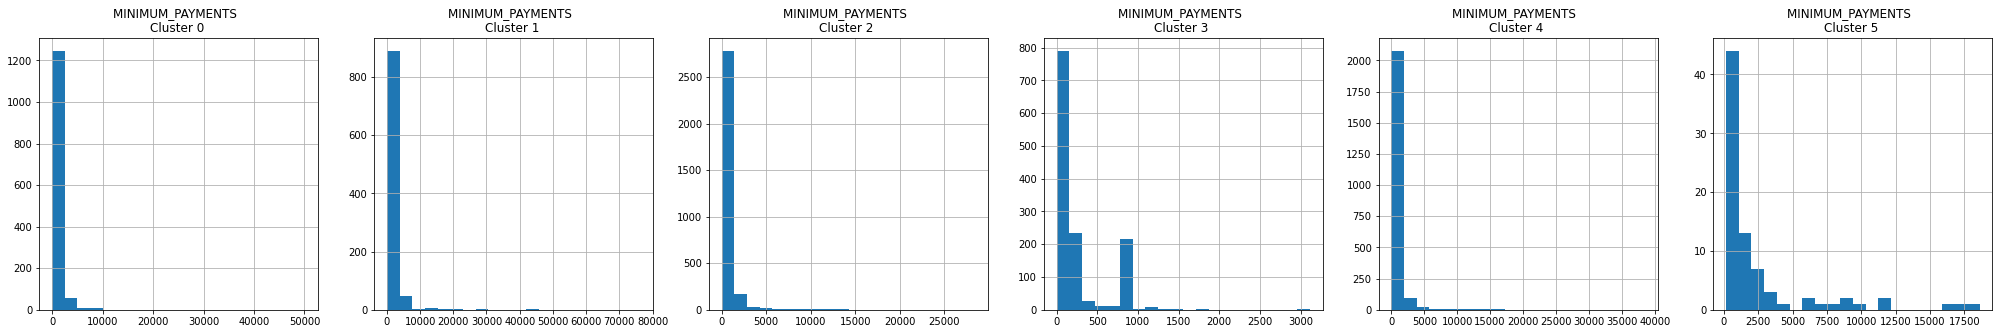

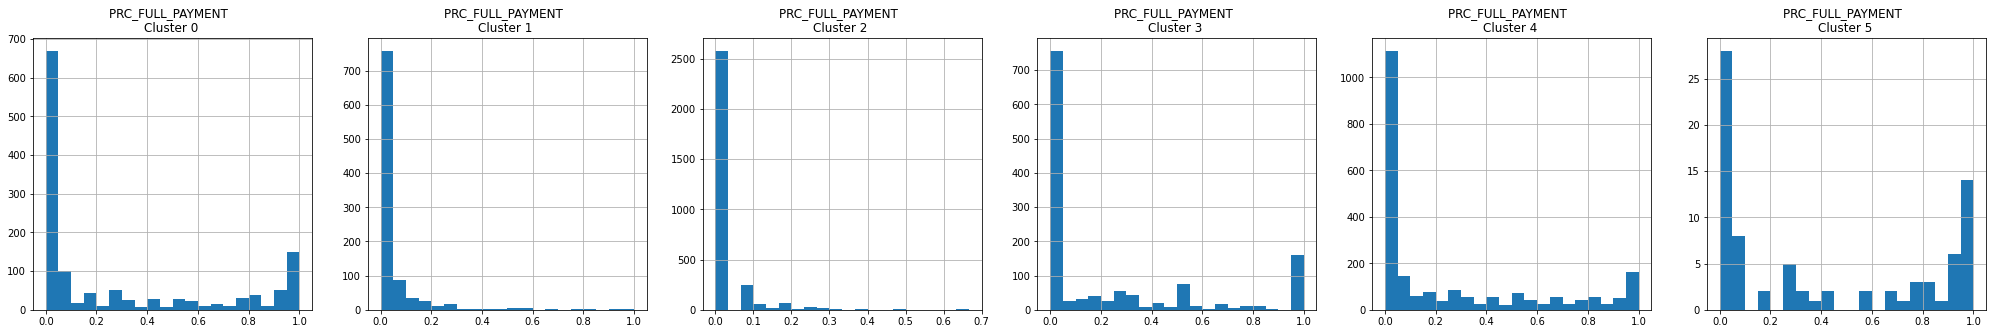

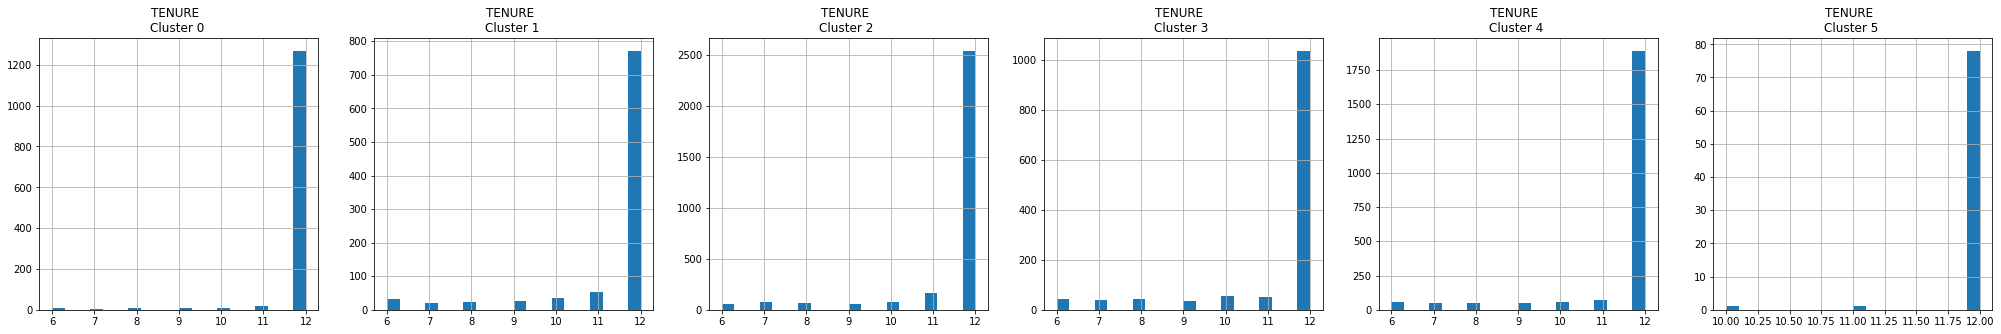

In [58]:
for i in df.columns:
    plt.figure(figsize=(35,5))
    for j in range(6):
        plt.subplot(1,6,j+1)
        cluster=df_cluster[df_cluster['cluster']==j]
        cluster[i].hist(bins=20)
        plt.title('{}  \nCluster {} '.format(i,j))
plt.show()
#this histogram plot will tell you which variable follows what cluster and cluster frequencies

In [59]:
# dimension reduction technique extraction method PCA
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(df_scaled)
principal_comp

array([[-1.68222086, -1.07645076],
       [-1.13829599,  2.50648101],
       [ 0.96968417, -0.38351697],
       ...,
       [-0.92620392, -1.81078825],
       [-2.33655154, -0.65797019],
       [-0.55642067, -0.40046709]])

In [60]:
pca_df=pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076451
1,-1.138296,2.506481
2,0.969684,-0.383517
3,-0.873629,0.043168
4,-1.599434,-0.688582


In [61]:
pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076451,2
1,-1.138296,2.506481,1
2,0.969684,-0.383517,0
3,-0.873629,0.043168,2
4,-1.599434,-0.688582,2


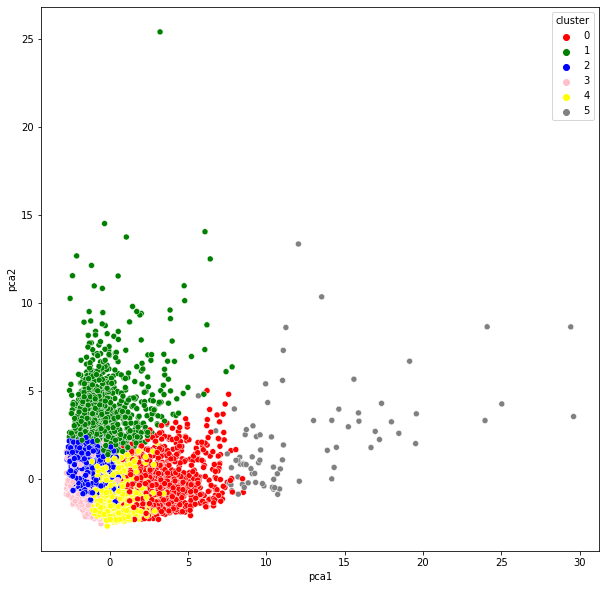

In [64]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2',hue='cluster',data=pca_df,palette=['red','green','blue','pink','yellow','gray'])